In [2]:
import pandas as pd 
import yfinance as yf 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from itertools import product

C:\Users\Kamir\AppData\Local\Temp\ipykernel_92168\4107055879.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
ticker = ["EURUSD=X","EURGBP=X","EURCHF=X","EURJPY=X","EURAUD=X"]
debut="2004-01-01"
fin="2023-08-31"

In [4]:
df=yf.download(ticker,debut,fin).Close

[*********************100%%**********************]  5 of 5 completed


In [27]:
df.to_csv("fx_pairs.csv")

Get data ()

In [5]:
raw=pd.read_csv("fx_pairs.csv", parse_dates=["Date"], index_col="Date")
raw

,EURAUD=X,EURCHF=X,EURGBP=X,EURJPY=X,EURUSD=X
Date,,,,,
2004-01-01,1.67210,1.56000,0.70440,135.009995,1.258194
2004-01-02,1.65750,1.55850,0.70050,134.669998,1.258194
2004-01-05,1.65220,1.56300,0.70170,134.800003,1.268698
2004-01-06,1.65410,1.56700,0.69840,135.110001,1.272103
2004-01-07,1.64510,1.56700,0.69520,134.179993,1.264095
...,...,...,...,...,...
2023-08-25,1.68382,0.95591,0.85749,157.725006,1.079914
2023-08-28,1.68262,0.95530,0.85760,158.207993,1.079739
2023-08-29,NaN,0.95641,0.85836,158.544998,1.082556


In [6]:
raw=raw["EURAUD=X"].to_frame().dropna() #selecting an instrument
raw

,EURAUD=X
Date,
2004-01-01,1.67210
2004-01-02,1.65750
2004-01-05,1.65220
2004-01-06,1.65410
2004-01-07,1.64510
...,...
2023-08-24,1.67652
2023-08-25,1.68382
2023-08-28,1.68262


In [7]:
raw=raw.loc["2010-01-01":"2023-08-31"] #setting a time period


In [8]:
raw

,EURAUD=X
Date,
2010-01-01,1.60230
2010-01-04,1.58050
2010-01-05,1.57520
2010-01-06,1.56440
2010-01-07,1.55920
...,...
2023-08-24,1.67652
2023-08-25,1.68382
2023-08-28,1.68262


In [9]:
raw.rename(columns={"EURAUD=X":"price"}, inplace=True) #changing the column name

C:\Users\Kamir\AppData\Local\Temp\ipykernel_92168\1176880035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw.rename(columns={"EURAUD=X":"price"}, inplace=True) #changing the column name


In [10]:
raw

,price
Date,
2010-01-01,1.60230
2010-01-04,1.58050
2010-01-05,1.57520
2010-01-06,1.56440
2010-01-07,1.55920
...,...
2023-08-24,1.67652
2023-08-25,1.68382
2023-08-28,1.68262


In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3561 entries, 2010-01-01 to 2023-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3561 non-null   float64
dtypes: float64(1)
memory usage: 55.6 KB


In [18]:
raw["returns"]=np.log(raw.price/raw.price.shift())

C:\Users\Kamir\AppData\Local\Temp\ipykernel_75036\3410694512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw["returns"]=np.log(raw.price/raw.price.shift())


In [19]:
raw["sma_s"]=raw["price"].rolling(50).mean()
raw["sma_l"]=raw["price"].rolling(200).mean()

C:\Users\Kamir\AppData\Local\Temp\ipykernel_75036\4216722460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw["sma_s"]=raw["price"].rolling(50).mean()
C:\Users\Kamir\AppData\Local\Temp\ipykernel_75036\4216722460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw["sma_l"]=raw["price"].rolling(200).mean()


In [20]:
raw

,price,returns,sma_s,sma_l
Date,,,,
2010-01-01,1.60230,NaN,NaN,NaN
2010-01-04,1.58050,-0.013699,NaN,NaN
2010-01-05,1.57520,-0.003359,NaN,NaN
2010-01-06,1.56440,-0.006880,NaN,NaN
2010-01-07,1.55920,-0.003329,NaN,NaN
...,...,...,...,...
2023-08-24,1.67652,-0.006972,1.650626,1.605226
2023-08-25,1.68382,0.004345,1.652487,1.605900
2023-08-28,1.68262,-0.000713,1.654313,1.606584


In [50]:
class SMABacktester ():
    def __init__(self, symbol,sma_s,sma_l,start,end):
        self.symbol=symbol
        self.sma_s=sma_s
        self.sma_l=sma_l
        self.start=start
        self.end=end
        self.results=None 
        self.get_data()
        self.prepare_data()
        
    def get_data(self) : 
        raw=pd.read_csv("fx_pairs.csv", parse_dates=["Date"], index_col="Date").copy()
        raw=raw[self.symbol].to_frame().dropna()
        raw=raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol:"price"}, inplace=True) #changing the column name
        self.data=raw
        return raw 
    
    def prepare_data(self) :
        raw["returns"]=np.log(raw.price/raw.price.shift())
        raw["sma_s"]=raw.price.rolling(self.sma_s).mean()
        raw["sma_l"]=raw.price.rolling(self.sma_l).mean()
        self.data=raw
        return raw
    
    def set_parameters(self, sma_s= None, sma_l= None):
        if sma_s is not None: 
            self.sma_s= sma_s
            self.data["sma_s"]=self.data["price"].rolling(self.sma_s).mean()
        if sma_l is not None:
            self.sma_l= sma_l
            self.data["sma_l"]=self.data["price"].rolling(self.sma_l).mean()
    
    def test_strategy(self):
        data=self.data.copy().dropna()
        data["position"]=np.where(data["sma_s"]>data["sma_l"],1,-1)
        data["strategy"]=data["position"].shift()*data["returns"]
        data.dropna()
        data["creturns"]=data["returns"].cumsum().apply(np.exp)
        data["cstrategy"]=data["strategy"].cumsum().apply(np.exp)
        self.results=data
        
        perf=data["cstrategy"].iloc[-1]
        outperf=perf - data["creturns"].iloc[-1]
        return round(perf,6), round(outperf,6)
    
    
    def plot_results(self):
        if self.results is None:
            print("Run test_strategy() first")
        else:
            title="{} | sma_s={} | sma_l={}".format(self.symbol,self.sma_s,self.sma_l)
            self.results[["creturns","cstrategy"]].plot(title=title, figsize=(15,8))
            
    def optimize_parameters(self,sma_s_range,sma_l_range):
        combinations = list(product(range(*sma_s_range),range(*sma_l_range)))
        
        results=[]
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
        
        best_perf = np.max(results) #best performance
        opt= combinations[np.argmax(results)] #optimal parameters
        
        #set the optimal strategy
        self.set_parameters(opt[0],opt[1])
        self.test_strategy
        
        #create a df with many results
        many_results= pd.DataFrame(data=combinations, columns=["sma_s","sma_l"])
        many_results["performance"]=results
        self.results_overview=many_results
        
        return opt, best_perf, many_results

In [51]:
tester = SMABacktester("EURAUD=X", 50, 200,"2004-01-01", "2023-08-31")

C:\Users\Kamir\AppData\Local\Temp\ipykernel_75036\365372323.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw["returns"]=np.log(raw.price/raw.price.shift())
C:\Users\Kamir\AppData\Local\Temp\ipykernel_75036\365372323.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw["sma_s"]=raw.price.rolling(self.sma_s).mean()
C:\Users\Kamir\AppData\Local\Temp\ipykernel_75036\365372323.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [52]:
tester.get_data()

,price
Date,
2004-01-01,1.67210
2004-01-02,1.65750
2004-01-05,1.65220
2004-01-06,1.65410
2004-01-07,1.64510
...,...
2023-08-24,1.67652
2023-08-25,1.68382
2023-08-28,1.68262


In [49]:
tester.prepare_data()

C:\Users\Kamir\AppData\Local\Temp\ipykernel_75036\415312998.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw["returns"]=np.log(raw.price/raw.price.shift())
C:\Users\Kamir\AppData\Local\Temp\ipykernel_75036\415312998.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw["sma_s"]=raw.price.rolling(self.sma_s).mean()
C:\Users\Kamir\AppData\Local\Temp\ipykernel_75036\415312998.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,price,returns,sma_s,sma_l
Date,,,,
2010-01-01,1.60230,NaN,NaN,NaN
2010-01-04,1.58050,-0.013699,NaN,NaN
2010-01-05,1.57520,-0.003359,NaN,NaN
2010-01-06,1.56440,-0.006880,NaN,NaN
2010-01-07,1.55920,-0.003329,NaN,NaN
...,...,...,...,...
2023-08-24,1.67652,-0.006972,1.650626,1.605226
2023-08-25,1.68382,0.004345,1.652487,1.605900
2023-08-28,1.68262,-0.000713,1.654313,1.606584


In [22]:
tester = SMABacktester("EURAUD=X", 50, 200,"2004-01-01", "2023-08-31")

In [23]:
tester.data.isna().sum()

price        0
returns      1
sma_s       49
sma_l      199
dtype: int64

Setting new SMA parameters

In [24]:
tester.set_parameters(sma_s=25, sma_l=150)

In [25]:
tester.sma_s

25

In [26]:
tester.data.isna().sum()

price        0
returns      1
sma_s       24
sma_l      149
dtype: int64

test strategy

In [27]:
tester = SMABacktester("EURAUD=X", 50, 200,"2004-01-01", "2023-08-31")

In [28]:
tester.test_strategy()

(1.203444, 0.211156)

In [29]:
tester.results.dropna()

,price,returns,sma_s,sma_l,position,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.68910,-0.006315,1.723916,1.681553,1,-0.006315,0.993588,0.993705
2004-10-08,1.68820,-0.000533,1.723494,1.681707,1,-0.000533,0.993059,0.993176
2004-10-11,1.68620,-0.001185,1.722982,1.681877,1,-0.001185,0.991882,0.991999
2004-10-12,1.68880,0.001541,1.722610,1.682050,1,0.001541,0.993412,0.993529
2004-10-13,1.70070,0.007022,1.722444,1.682328,1,0.007022,1.000412,1.000529
...,...,...,...,...,...,...,...,...
2023-08-24,1.67652,-0.006972,1.650626,1.605226,1,-0.006972,0.986188,1.196046
2023-08-25,1.68382,0.004345,1.652487,1.605900,1,0.004345,0.990482,1.201254
2023-08-28,1.68262,-0.000713,1.654313,1.606584,1,-0.000713,0.989776,1.200398


### plot results

In [30]:
tester = SMABacktester("EURAUD=X", 50, 200,"2004-01-01", "2023-08-31")

In [31]:
tester.test_strategy()

(1.203444, 0.211156)

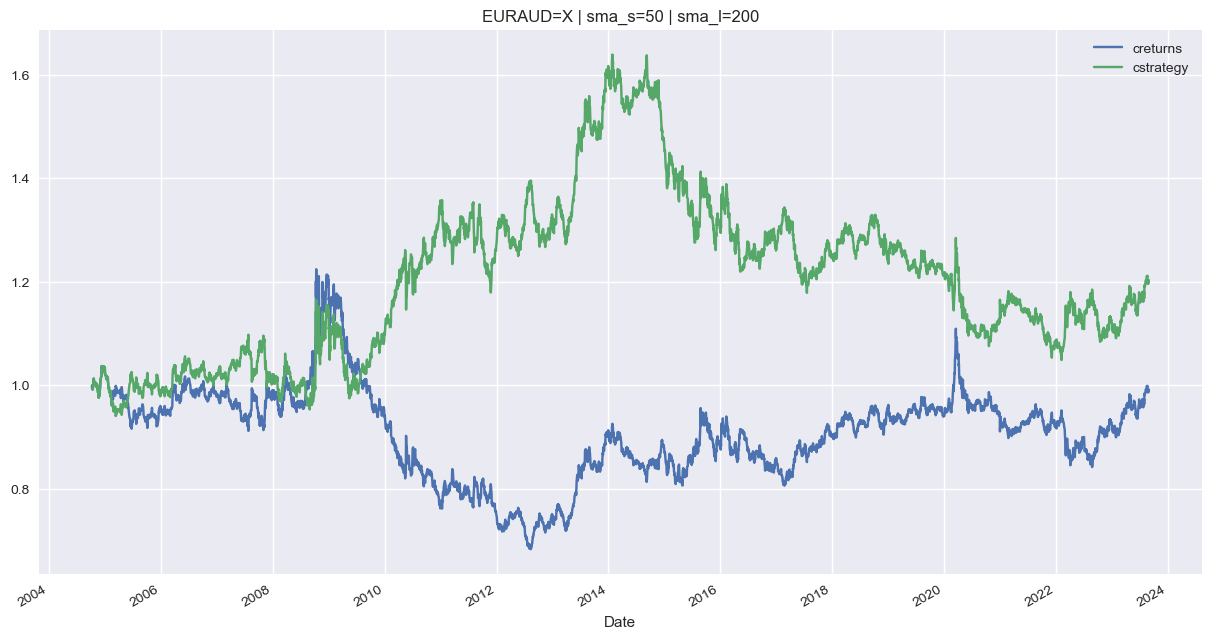

In [32]:
tester.plot_results()

#### optimize parameters

In [33]:
tester = SMABacktester("EURUSD=X", 50, 200,"2004-01-01", "2023-08-31")

In [9]:
tester.optimize_parameters((10,50,1),(100,252,1))

((46, 137),
 2.853883,
       sma_s  sma_l  performance
 0        10    100     1.098043
 1        10    101     1.068725
 2        10    102     1.077092
 3        10    103     1.086991
 4        10    104     1.173537
 ...     ...    ...          ...
 6075     49    247     1.521162
 6076     49    248     1.548842
 6077     49    249     1.506525
 6078     49    250     1.509009
 6079     49    251     1.477131
 
 [6080 rows x 3 columns])

NameError: name 'pd' is not defined